In [7]:
%matplotlib inline
import numpy as np
from scipy import sparse
import pandas as pd
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE, MDS, Isomap
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import time
import pandas as pd
import pickle
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib as mpl
from yellowbrick.style import rcmod
from scipy.stats import spearmanr
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import seaborn as sns

In [8]:
#loading the data 
df = pd.read_csv("/home/priyanshu/ML_Files/Project_Solar_Energy_Prediction/Dataset/daily.csv")
df.head()

,Date,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter,Solar energy
0,2/1/2016,0.10,9.45,3.11,0.32,79.46,4.70,29.23,30.02,20256
1,2/2/2016,0.80,3.94,6.99,6.22,93.60,13.29,28.91,29.70,1761
2,2/3/2016,0.87,8.70,1.62,0.02,85.00,16.73,29.03,29.82,2775
3,2/4/2016,0.37,10.00,-2.47,-5.89,74.52,9.46,29.46,30.26,28695
4,2/5/2016,0.52,9.21,-2.00,-4.15,82.03,5.92,29.55,30.35,9517


Data Frame Dim:  (637, 10)


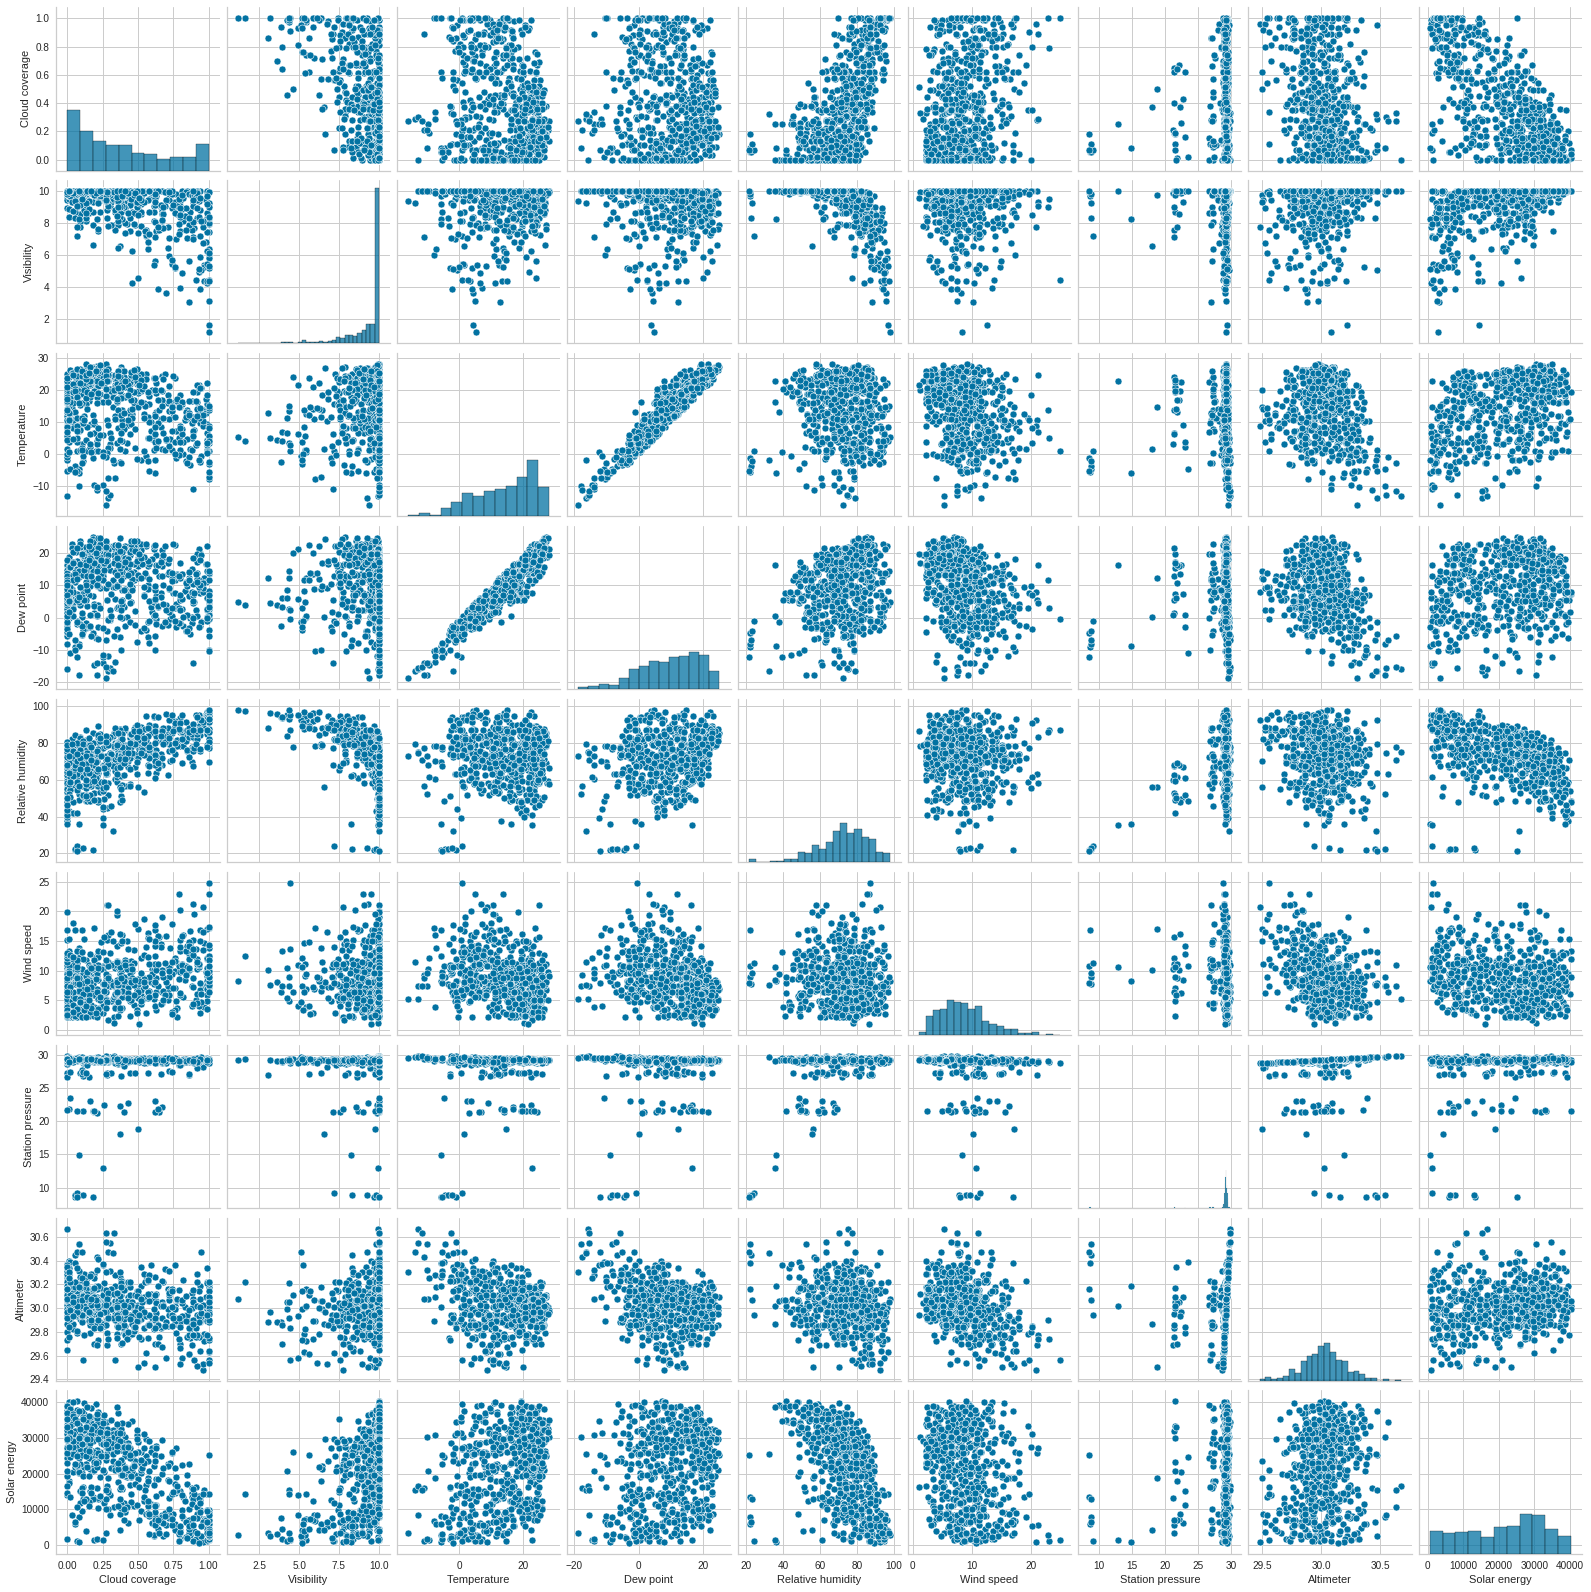

In [9]:
#Exploratory Data Analysis

print("Data Frame Dim: ", str(df.shape))
sns.pairplot(df)

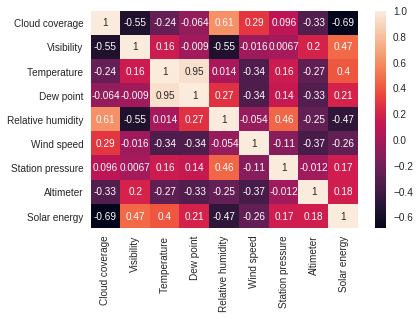

In [10]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

Principal Component Analysis (PCA)

In [6]:
scaler = MinMaxScaler()
#scalar = StandardScaler()

df = pd.DataFrame(scaler.fit_transform(df.iloc[:,1:]), columns=df.columns[1:])

x = df[['Cloud coverage','Visibility','Temperature','Dew point','Relative humidity','Wind speed',
       'Station pressure','Altimeter']]
pca = PCA().fit(x)
z = pca.transform(x)
print(z)
plt.title("2 Component PCA")
plt.scatter(z[:,0],z[:,1])

NameError: name 'MinMaxScaler' is not defined

In [68]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [69]:
principalDf

,principal component 1,principal component 2
0,-0.152848,0.282300
1,0.722711,-0.063847
2,0.655721,0.217482
3,0.091025,0.512866
4,0.226358,0.413104
...,...,...
632,-0.045091,0.153654
633,-0.262403,0.136307
634,0.504271,0.215637
635,0.617078,0.178757


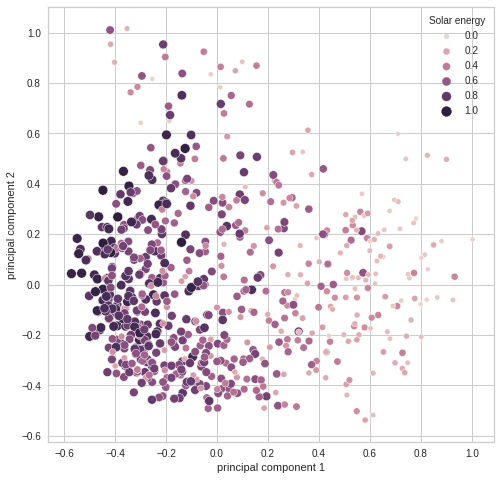

In [70]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
sns.scatterplot(data = principalDf, x = 'principal component 1', y = 'principal component 2'
               , hue = df['Solar energy']
               , size = df['Solar energy']
               , ax = ax
               )

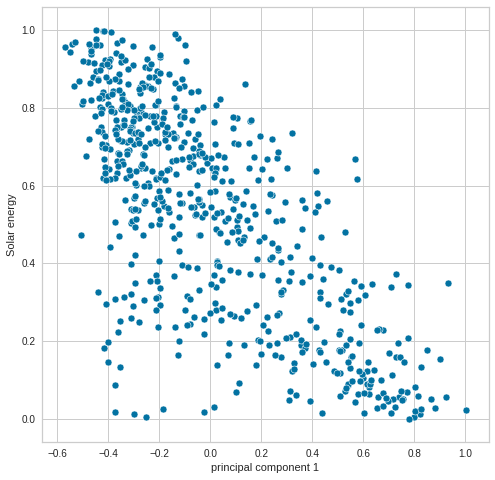

In [71]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
sns.scatterplot(x = principalDf['principal component 1'], y = df['Solar energy']
               , ax = ax
               )

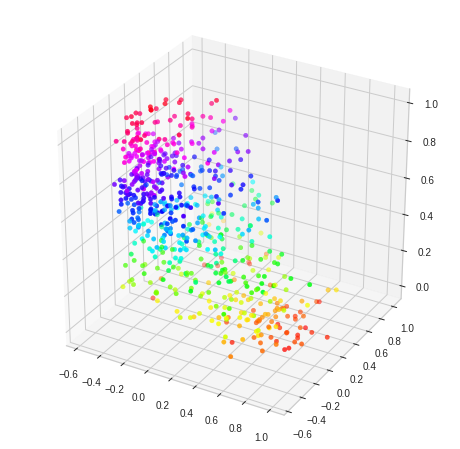

In [72]:
from mpl_toolkits import mplot3d


fig = plt.figure(figsize = (8, 8))
ax = plt.axes(projection="3d")
ax.scatter3D(principalDf['principal component 1']
             ,principalDf['principal component 2']
             ,df['Solar energy'], c=df['Solar energy'], cmap='hsv'
            )

Multi-dimentional Scaling (MDS)


In [73]:
from sklearn.manifold import MDS
mds = MDS(n_components=2)
data_embedded = mds.fit_transform(x)

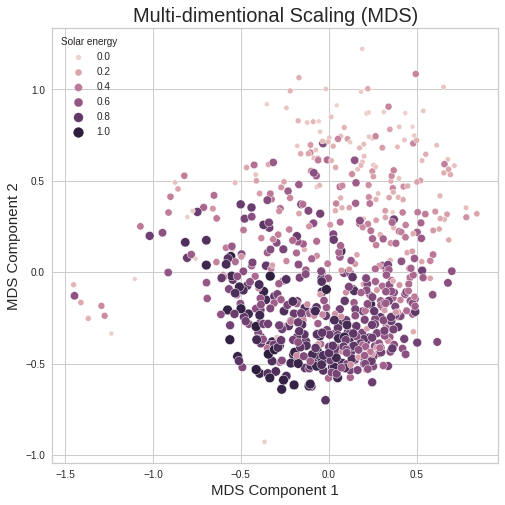

In [74]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('MDS Component 1', fontsize = 15)
ax.set_ylabel('MDS Component 2', fontsize = 15)
ax.set_title('Multi-dimentional Scaling (MDS)', fontsize = 20)
sns.scatterplot(x = data_embedded[:,0]
               ,y = data_embedded[:,1]
               , size = df['Solar energy'],hue = df['Solar energy'], ax = ax)

t-SNE Embedding

In [75]:
from sklearn.manifold import TSNE
t_sne = TSNE(n_components=2,perplexity=40)
data_embedded_t_sne = t_sne.fit_transform(z[:,0:50])
data_embedded_t_sne.shape

(637, 2)

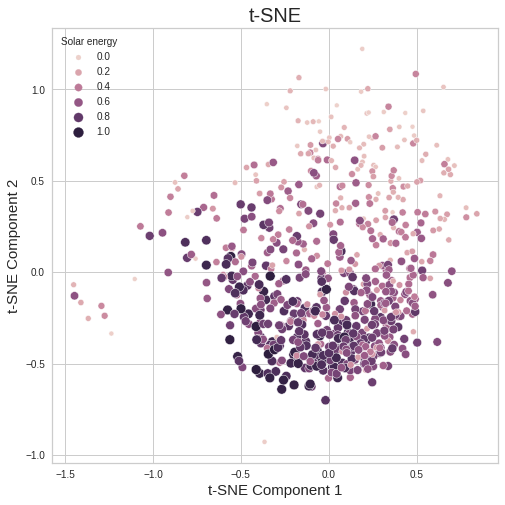

In [76]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('t-SNE Component 1', fontsize = 15)
ax.set_ylabel('t-SNE Component 2', fontsize = 15)
ax.set_title('t-SNE', fontsize = 20)
sns.scatterplot(x = data_embedded[:,0]
               ,y = data_embedded[:,1]
               , size = df['Solar energy'],hue = df['Solar energy'], ax = ax)

Regression: Consider PCA as predictors

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
y = np.array(df.iloc[:,-1]).reshape(-1, 1)
se_norm = pd.DataFrame(scaler.fit_transform(y), columns = ['Solar energy'])

df_pca = pd.concat([principalDf,se_norm],axis=1)
print(df_pca.head(), end="\n\n")

train, test = train_test_split(df_pca,  test_size=0.2)
reg = LinearRegression()
reg.fit(train.iloc[:,0:2],train.iloc[:,-1])
print("Multiple Regression Coefficients are: " + str(reg.coef_), end = "\n\n")
print("Intercept: ", str(reg.intercept_), end = "\n\n")

pred = reg.predict(test.iloc[:,0:2])

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(test.iloc[:,-1], pred))

# The coefficient of determination
print('Coefficient of determination: %.2f' % r2_score(test.iloc[:,-1], pred))

   principal component 1  principal component 2  Solar energy
0              -0.152848               0.282300      0.496054
1               0.722711              -0.063847      0.029774
2               0.655721               0.217482      0.055338
3               0.091025               0.512866      0.708811
4               0.226358               0.413104      0.225312

Multiple Regression Coefficients are: [-0.53655873 -0.0556901 ]

Intercept:  0.528595074511792

Mean squared error: 0.03
Coefficient of determination: 0.64


Cross Validation Performance

In [120]:

from sklearn.model_selection import KFold

crossvalidation = KFold(n_splits=5, shuffle=True)
model = LinearRegression().fit(df_pca.iloc[:,0:2],df_pca.iloc[:,-1])

n_scores = cross_val_score(model,df_pca.iloc[:,0:2],df_pca.iloc[:,-1], scoring="r2"
                           ,cv=crossvalidation, n_jobs=1)

print(str(n_scores))
print('Mean r2_score: %.3f' % (np.mean(n_scores)))

[0.47294389 0.52498537 0.50114031 0.54833157 0.59913496]
Mean r2_score: 0.529
